# Volcano Cleaning


A data cleaning project

In [110]:
#import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [111]:
df = pd.read_csv('volcano_data_2010.csv')

In [112]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                63 non-null     int64  
 1   Month                               63 non-null     int64  
 2   Day                                 57 non-null     float64
 3   TSU                                 2 non-null      object 
 4   EQ                                  1 non-null      object 
 5   Name                                63 non-null     object 
 6   Location                            63 non-null     object 
 7   Country                             63 non-null     object 
 8   Latitude                            63 non-null     float64
 9   Longitude                           63 non-null     float64
 10  Elevation                           63 non-null     int64  
 11  Type                                63 non-null

Assuming with have a target of 'deaths', we HOPE to have 29 rows. We could start cutting down the dataframe around this neccesary value, but we have another column called 'total_deaths'. Maybe we could merge the two to create a dataframe with more than 29 rows? Hopefully the null values, are not one-to-one.

In [113]:
df[['DEATHS','TOTAL_DEATHS']].head(10)

,DEATHS,TOTAL_DEATHS
0,NaN,NaN
1,2.0,2.0
2,1.0,1.0
3,NaN,NaN
4,4.0,4.0
5,2.0,2.0
6,367.0,367.0
7,NaN,NaN
8,NaN,NaN
9,1.0,1.0


They look identical but we double check

In [114]:
# Check the correlation
df['TOTAL_DEATHS'].corr(df['DEATHS']) 

1.0

We have a perfect correlation and duplicate values so these columns are identical. Let's do this another way.

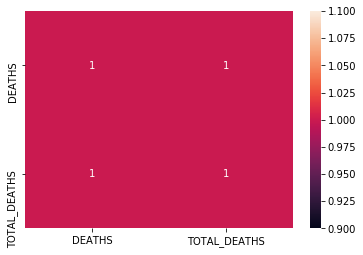

In [115]:
sns.heatmap(df[['DEATHS','TOTAL_DEATHS']].isnull().corr(), annot=True) 
# checking that there are no cases that a 'Deaths' of non-null, does 
# not correspont to a null in 'total_deaths', which could help
# to expand the number of rows

The columns are identical, so we drop 'Total_deaths' and dramatically start reducing the data frame. We cannot combine info from 'total_deaths' and 'deaths' columns, to keep rows.

In [116]:
df.drop('TOTAL_DEATHS', axis=1,inplace=True)

In [117]:
df = df[df['DEATHS'].isnull()==False]

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 1 to 62
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                29 non-null     int64  
 1   Month                               29 non-null     int64  
 2   Day                                 27 non-null     float64
 3   TSU                                 0 non-null      object 
 4   EQ                                  0 non-null      object 
 5   Name                                29 non-null     object 
 6   Location                            29 non-null     object 
 7   Country                             29 non-null     object 
 8   Latitude                            29 non-null     float64
 9   Longitude                           29 non-null     float64
 10  Elevation                           29 non-null     int64  
 11  Type                                29 non-null

In [119]:
# Make a script that creates a list of columns to keep
# Based on %70 non-null

def filter70(cols):
    toKeep = []
    
    for col in cols:
        if (len(df[df[col].notnull()])/29) > 0.7:
            toKeep.append(col)
            
    return toKeep

In [120]:
toKeep = filter70(df.columns)

In [121]:
df = df[toKeep]

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 1 to 62
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      29 non-null     int64  
 1   Month                     29 non-null     int64  
 2   Day                       27 non-null     float64
 3   Name                      29 non-null     object 
 4   Location                  29 non-null     object 
 5   Country                   29 non-null     object 
 6   Latitude                  29 non-null     float64
 7   Longitude                 29 non-null     float64
 8   Elevation                 29 non-null     int64  
 9   Type                      29 non-null     object 
 10  Status                    29 non-null     object 
 11  Time                      29 non-null     object 
 12  DEATHS                    29 non-null     float64
 13  DEATHS_DESCRIPTION        29 non-null     float64
 14  TOTAL_DEATHS

In [123]:
df[df['Day'].isnull()] # the table is almost rectangular, we are
# missing two values in the 'day' column

,Year,Month,Day,Name,Location,Country,Latitude,Longitude,Elevation,Type,Status,Time,DEATHS,DEATHS_DESCRIPTION,TOTAL_DEATHS_DESCRIPTION
41,2015,10,NaN,Okataina,New Zealand,New Zealand,-38.12,176.50,1111,Lava dome,Historical,D1,1.0,1.0,1.0
62,2018,4,NaN,Aoba,Vanuatu-SW Pacific,Vanuatu,-15.40,167.83,1496,Shield volcano,Historical,D1,4.0,1.0,1.0


We could research these events and fill in the exact "Day" value. We could also use this to create a datetime column. Instead, however, we will assume that day and month time periods are too specific and not neccesary. We will only save the "Year" column.

In [124]:
df.drop(axis=1,columns=['Day','Month'],inplace=True)
df.set_index(pd.Index([i for i in range(1,30)]),inplace=True)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 1 to 29
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      29 non-null     int64  
 1   Name                      29 non-null     object 
 2   Location                  29 non-null     object 
 3   Country                   29 non-null     object 
 4   Latitude                  29 non-null     float64
 5   Longitude                 29 non-null     float64
 6   Elevation                 29 non-null     int64  
 7   Type                      29 non-null     object 
 8   Status                    29 non-null     object 
 9   Time                      29 non-null     object 
 10  DEATHS                    29 non-null     float64
 11  DEATHS_DESCRIPTION        29 non-null     float64
 12  TOTAL_DEATHS_DESCRIPTION  29 non-null     float64
dtypes: float64(5), int64(2), object(6)
memory usage: 3.2+ KB


Looks pretty good, we have a rectangular dataframe. Now, let's compare 'deaths_description' and 'total_deaths_description' and see if one is a perfect predictor of the other.

In [126]:
df[['DEATHS_DESCRIPTION','TOTAL_DEATHS_DESCRIPTION']].head()

,DEATHS_DESCRIPTION,TOTAL_DEATHS_DESCRIPTION
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
5,3.0,3.0


In [127]:
df['DEATHS_DESCRIPTION'].corr(df["TOTAL_DEATHS_DESCRIPTION"])

0.9999999999999999

In [128]:
# Yes, the two columns are linearly dependent, so we drop a column
df.drop('TOTAL_DEATHS_DESCRIPTION', axis=1, inplace=True)

In [129]:
df.head() 

,Year,Name,Location,Country,Latitude,Longitude,Elevation,Type,Status,Time,DEATHS,DEATHS_DESCRIPTION
1,2010,Eyjafjallajokull,Iceland-S,Iceland,63.630,-19.620,1666,Stratovolcano,Historical,D1,2.0,1.0
2,2010,Pacaya,Guatemala,Guatemala,14.381,-90.601,2552,Complex volcano,Historical,D1,1.0,1.0
3,2010,Karangetang [Api Siau],Sangihe Is-Indonesia,Indonesia,2.780,125.480,1784,Stratovolcano,Historical,D1,4.0,1.0
4,2010,Sinabung,Sumatra,Indonesia,3.170,98.392,2460,Stratovolcano,Holocene,U,2.0,1.0
5,2010,Merapi,Java,Indonesia,-7.542,110.442,2947,Stratovolcano,Historical,D1,367.0,3.0


### Let's take a deeper look at column 'Time'

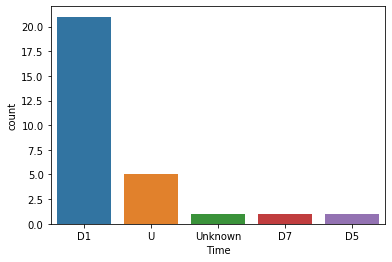

In [130]:
sns.countplot(df['Time'])

This is a good time for some domain knowledge. The dataset doesn't explain what the 'Time' column means. It's interesting to note that 'U' and 'unknown' values might be equivalent. Since we don't understand it however, we dont need it and thus, we will get rid of it.

In [131]:
df.drop('Time', axis=1,inplace=True)

### More Non-Numeric Columns

In [132]:
df.head()

,Year,Name,Location,Country,Latitude,Longitude,Elevation,Type,Status,DEATHS,DEATHS_DESCRIPTION
1,2010,Eyjafjallajokull,Iceland-S,Iceland,63.630,-19.620,1666,Stratovolcano,Historical,2.0,1.0
2,2010,Pacaya,Guatemala,Guatemala,14.381,-90.601,2552,Complex volcano,Historical,1.0,1.0
3,2010,Karangetang [Api Siau],Sangihe Is-Indonesia,Indonesia,2.780,125.480,1784,Stratovolcano,Historical,4.0,1.0
4,2010,Sinabung,Sumatra,Indonesia,3.170,98.392,2460,Stratovolcano,Holocene,2.0,1.0
5,2010,Merapi,Java,Indonesia,-7.542,110.442,2947,Stratovolcano,Historical,367.0,3.0


We will remove 'Name', Location and Country because these items are very non-numeric and because location is also defined with 'Latitude'/'Longitude'.

In [133]:
df.drop(['Name','Location','Country'], axis=1, inplace=True)

We will however, numerify Type and Status using dummy variables.

### Creating dummy variables

We need dummy variables for 'Status' and 'Type' columns because our machine learning models often require numerical data.

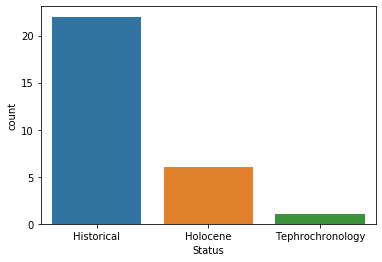

In [134]:
sns.countplot(data=df,x="Status") # First converting 'Status' column

In [135]:
status = pd.get_dummies(df['Status'],drop_first=True)

In [136]:
df.drop(columns="Status",inplace=True,axis=1)

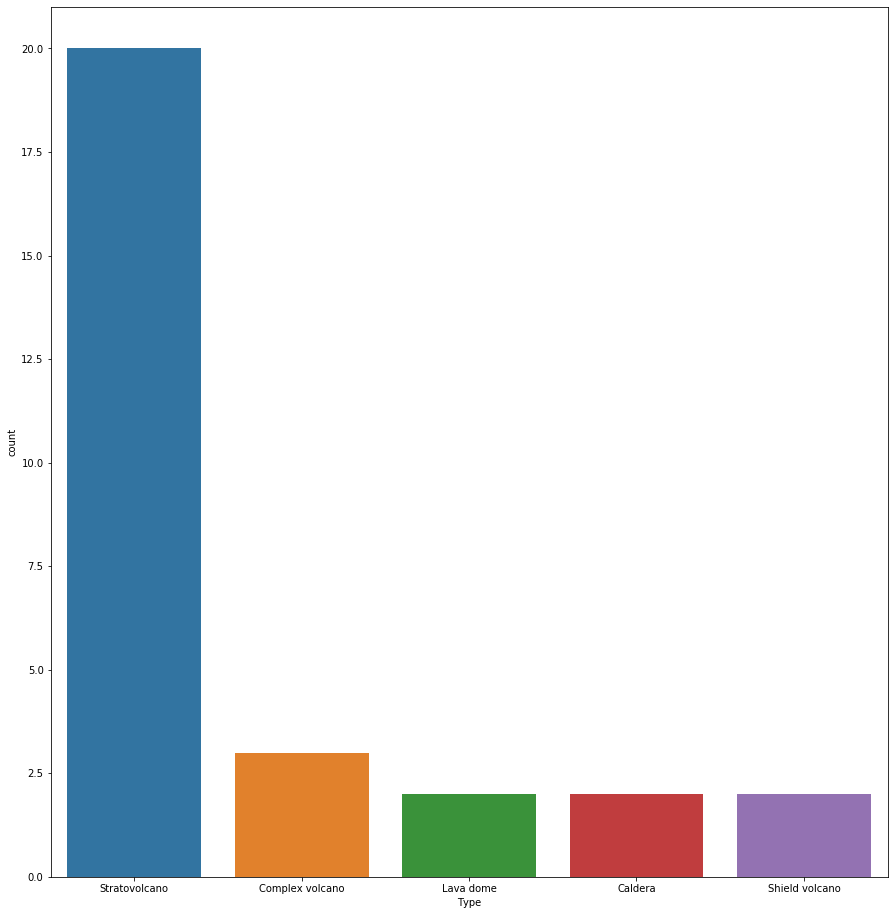

In [137]:
plt.figure(figsize=(15,16)) 
sns.countplot(data=df,x="Type") # Second, converting 'type' column

In [138]:
vType = pd.get_dummies(df['Type'], drop_first=True)

In [139]:
df.drop('Type',axis=1, inplace=True)

In [140]:
df = pd.concat([df,status,vType],axis=1) # Putting it all together
# This is our final 'df' variable and the dummy variables are ready

### Separating the data from the target column

In [141]:
y=df["DEATHS"]
X=df.drop('DEATHS',axis=1) # X and y are READY for machine learning

In [142]:
X.head()

,Year,Latitude,Longitude,Elevation,DEATHS_DESCRIPTION,Holocene,Tephrochronology,Complex volcano,Lava dome,Shield volcano,Stratovolcano
1,2010,63.630,-19.620,1666,1.0,0,0,0,0,0,1
2,2010,14.381,-90.601,2552,1.0,0,0,1,0,0,0
3,2010,2.780,125.480,1784,1.0,0,0,0,0,0,1
4,2010,3.170,98.392,2460,1.0,1,0,0,0,0,1
5,2010,-7.542,110.442,2947,3.0,0,0,0,0,0,1


In [143]:
y.head() 

1      2.0
2      1.0
3      4.0
4      2.0
5    367.0
Name: DEATHS, dtype: float64

## Conclusion

This dataset was chosen because it was not rectangular and it proved to be a good cleaning exercise. As an overview, we eliminated the columns that hosted less than %70 non-null. We thought about filling in two missing 'day' values but determined this unnecessary based on scope and dropped the column. We still had more to clean, however, as we made use of the categorical "Status" and "Volcano Type" columns with the use of dummy variables. Further reduction was possible but based on the size of the dataframe, I didn't want to further reduce the data.

Things we may have done differently is fill in missing values (especially 'Death' column) by researching each event one at a time. This would have given us more data (which may be vital considering the small size of this dataset) but may prove to be quite time consuming. We might also have dropped the outliers and kept the 'Day' and 'Month' columns. This dataset was quite messy but now it is cleaned and ready for machine learning.

NOTE: We will not be analyzing this data. This project was purely a cleaning excercize. 